In [1]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
N0_file = "cache/_N0/N0_my_Planck_14_14_TQU.npy"
ells_sample_file = "cache/_M/10000_1000/ells.npy"
M_file = "cache/_M/4000_1000/M.npy"

In [3]:
fisher = Fisher(N0_file, ells_sample_file, M_file)

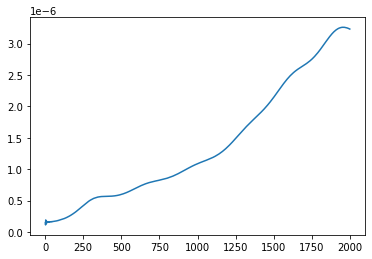

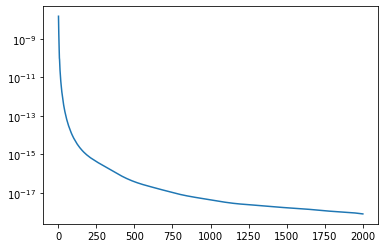

In [4]:
N0 = fisher.N0
N_phi = N0[0]
N_phi[4] = 0.5 * (N_phi[3] + N_phi[5])
ells = np.arange(2,2000)
plt.plot(ells, 0.25 * N_phi[ells]*(ells + 0.5)**4)
plt.figure()
plt.semilogy(ells, N_phi[ells])

In [5]:
Lmax = 2000
dL = 1
dTheta = 0.3
L3max = 2000
f_sky = 0.7
t0 = time.time()
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, dTheta, L3max, f_sky)
t1 = time.time()
print(f"Time = {t1 - t0}")
print(f"F = {F_conv_rot}")
print(f"S/N = {np.sqrt(F_conv_rot)}")

Time = 147.09592723846436
F = 0.006541727877981305
S/N = 0.0808809487950117


In [6]:
Lmax = 2000
dL = 1
dTheta = 0.3
L3max = 2000
f_sky = 0.7
t0 = time.time()
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher2(Lmax, dL, dTheta, L3max, f_sky)
t1 = time.time()
print(f"Time = {t1 - t0}")
print(f"F = {F_conv_rot}")
print(f"S/N = {np.sqrt(F_conv_rot)}")

Time = 73.8485951423645
F = 0.006431844749968854
S/N = 0.08019878272124119


In [7]:
Lmax = 2000
dL = 5
dTheta = 0.3
L3max = 2000
f_sky = 0.7
t0 = time.time()
F_conv = fisher.get_convergence_bispectrum_Fisher(Lmax, dL, dTheta, L3max, f_sky)
t1 = time.time()
print(f"Time = {t1 - t0}")
print(f"F = {F_conv}")
print(f"S/N = {np.sqrt(F_conv)}")

Time = 19.263159036636353
F = 0.32046310083192214
S/N = 0.5660946041360244


In [8]:
Lmax = 2000
dL = 5
dTheta = 0.3
L3max = 2000
f_sky = 0.7
t0 = time.time()
F_conv = fisher.get_convergence_bispectrum_Fisher2(Lmax, dL, dTheta, L3max, f_sky)
t1 = time.time()
print(f"Time = {t1 - t0}")
print(f"F = {F_conv}")
print(f"S/N = {np.sqrt(F_conv)}")

Time = 10.023349046707153
F = 0.25794474151529606
S/N = 0.5078826060373559


In [12]:
Lmax = 4000
dL = 1
dTheta = 0.3
L3max = 4000
f_skys = [0.65, 0.06, 0.4, 0.5, 0.4]
exps = ["my_SA", "my_SPT", "my_S4", "my_S5", "my_SO"]
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher = Fisher(N0_file, ells_sample_file, M_file)
    f_sky = f_skys[iii]
    F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher2(Lmax, dL, dTheta, L3max, f_sky)
    print(exp)
    print(f"S/N = {np.sqrt(F_conv_rot)}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


my_SA
S/N = 0.4144976540330068
---------------------------
my_SPT
S/N = 0.4961491564497076
---------------------------
my_S4
S/N = 3.2374256362938736
---------------------------
my_S5
S/N = 7.398889926111046
---------------------------
my_SO
S/N = 1.4955486064473038
---------------------------
Time = 1515.5014419555664


In [13]:
Lmax = 4000
dL = 1
dTheta = 0.3
L3max = 4000
f_skys = [0.65, 0.06, 0.4, 0.5, 0.4]
exps = ["my_SA", "my_SPT", "my_S4", "my_S5", "my_SO"]
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher = Fisher(N0_file, ells_sample_file, M_file)
    f_sky = f_skys[iii]
    F_conv_rot = fisher.get_convergence_bispectrum_Fisher2(Lmax, dL, dTheta, L3max, f_sky)
    print(exp)
    print(f"S/N = {np.sqrt(F_conv_rot)}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_SA
S/N = 2.843712589095752
---------------------------
my_SPT
S/N = 3.715951047033612
---------------------------
my_S4
S/N = 17.37944144256577
---------------------------
my_S5
S/N = 41.132681069651966
---------------------------
my_SO
S/N = 9.256930682549676
---------------------------
Time = 4702.653460979462
